# Data Reading

In [2]:
!pip install hmmlearn

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from hmmlearn.hmm import GaussianHMM
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
data =pd.read_csv('D://a_trash//MSFT.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,222.529999,223.000000,214.809998,217.690002,211.605301,37130100
1,2021-01-05,217.259995,218.520004,215.699997,217.899994,211.809433,23823000
2,2021-01-06,212.169998,216.490005,211.940002,212.250000,206.317352,35930700
3,2021-01-07,214.039993,219.339996,213.710007,218.289993,212.188538,27694500
4,2021-01-08,218.679993,220.580002,217.029999,219.619995,213.481339,22956200


In [24]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,286.107663,289.043466,283.130571,286.219137,282.062747,2.830042e+07
std,40.319480,40.330864,40.113798,40.287030,40.947497,1.039035e+07
min,212.169998,214.509995,211.940002,212.250000,206.317352,9.200800e+06
25%,251.000000,254.089996,248.729996,251.860001,247.389587,2.165650e+07
50%,283.959991,287.149994,280.170013,283.519989,278.528107,2.597860e+07
75%,320.029999,322.720001,316.209991,319.529999,316.617737,3.235650e+07
max,383.760010,384.299988,378.160004,382.700012,381.993622,9.042890e+07


In [25]:
train_size = int(0.8*data.shape[0])
print(train_size)

602


In [26]:
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size+1:]

In [27]:
train_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
597,2023-05-18,314.529999,319.040009,313.720001,318.519989,316.617737,27276000
598,2023-05-19,316.739990,318.750000,316.369995,318.339996,316.438782,27529500
599,2023-05-22,318.600006,322.589996,318.010010,321.179993,319.261841,24115700
600,2023-05-23,320.029999,322.720001,315.250000,315.260010,313.377197,30797200
601,2023-05-24,314.730011,316.500000,312.609985,313.850006,311.975616,23384900


In [28]:
test_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
748,2023-12-22,373.679993,375.179993,372.709991,374.579987,373.888580,17091100
749,2023-12-26,375.000000,376.940002,373.500000,374.660004,373.968445,12673100
750,2023-12-27,373.690002,375.059998,372.809998,374.070007,373.379547,14905400
751,2023-12-28,375.369995,376.459991,374.160004,375.279999,374.587280,14327000
752,2023-12-29,376.000000,377.160004,373.480011,376.040009,375.345886,18723000


In [29]:
def augment_features(dataframe):
    fracocp = (dataframe['Close']-dataframe['Open'])/dataframe['Open']
    frachp = (dataframe['High']-dataframe['Open'])/dataframe['Open']
    fraclp = (dataframe['Open']-dataframe['Low'])/dataframe['Open']
    new_dataframe = pd.DataFrame({'delOpenClose': fracocp,
                                 'delHighOpen': frachp,
                                 'delLowOpen': fraclp})
    new_dataframe.set_index(dataframe.index)

    return new_dataframe

In [30]:
def extract_features(dataframe):
    return np.column_stack((dataframe['delOpenClose'], dataframe['delHighOpen'], dataframe['delLowOpen']))

In [31]:
features = extract_features(augment_features(train_data))

In [32]:
features.shape

(602, 3)

In [33]:
print(len(data))

753


# HMM

In [34]:
model = GaussianHMM(n_components=3)
feature_train_data = augment_features(train_data)
features_train = extract_features(feature_train_data)


In [35]:
print(feature_train_data)

     delOpenClose  delHighOpen  delLowOpen
0       -0.021750     0.002112    0.034692
1        0.002946     0.005800    0.007180
2        0.000377     0.020361    0.001084
3        0.019856     0.024762    0.001542
4        0.004299     0.008689    0.007545
..            ...          ...         ...
597      0.012686     0.014339    0.002575
598      0.005051     0.006346    0.001168
599      0.008098     0.012524    0.001852
600     -0.014905     0.008405    0.014936
601     -0.002796     0.005624    0.006736

[602 rows x 3 columns]


In [36]:
print(features_train)

[[-0.02174986  0.00211208  0.03469196]
 [ 0.00294577  0.00579954  0.00718033]
 [ 0.00037707  0.02036106  0.00108402]
 ...
 [ 0.00809789  0.01252351  0.00185184]
 [-0.01490482  0.00840547  0.0149361 ]
 [-0.00279606  0.00562383  0.00673601]]


In [37]:
model.fit(features_train)

D:\code\anaconda4-22-2024\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


GaussianHMM(n_components=3)

In [39]:
import itertools

test_augmented = augment_features(test_data)
fracocp = test_augmented['delOpenClose']
frachp = test_augmented['delHighOpen']
fraclp = test_augmented['delLowOpen']

sample_space_fracocp = np.linspace(fracocp.min(), fracocp.max(), 50)
sample_space_fraclp = np.linspace(fraclp.min(), frachp.max(), 10)
sample_space_frachp = np.linspace(frachp.min(), frachp.max(), 10)

possible_outcomes = np.array(list(itertools.product(sample_space_fracocp, sample_space_frachp, sample_space_fraclp)))

In [46]:
print(sample_space_fracocp)
print(possible_outcomes)

[-0.03869612 -0.0371003  -0.03550448 -0.03390866 -0.03231283 -0.03071701
 -0.02912119 -0.02752537 -0.02592954 -0.02433372 -0.0227379  -0.02114207
 -0.01954625 -0.01795043 -0.01635461 -0.01475878 -0.01316296 -0.01156714
 -0.00997132 -0.00837549 -0.00677967 -0.00518385 -0.00358803 -0.0019922
 -0.00039638  0.00119944  0.00279527  0.00439109  0.00598691  0.00758273
  0.00917856  0.01077438  0.0123702   0.01396602  0.01556185  0.01715767
  0.01875349  0.02034931  0.02194514  0.02354096  0.02513678  0.0267326
  0.02832843  0.02992425  0.03152007  0.0331159   0.03471172  0.03630754
  0.03790336  0.03949919]
[[-0.03869612  0.          0.        ]
 [-0.03869612  0.          0.00673099]
 [-0.03869612  0.          0.01346199]
 ...
 [ 0.03949919  0.06057893  0.04711695]
 [ 0.03949919  0.06057893  0.05384794]
 [ 0.03949919  0.06057893  0.06057893]]


In [15]:
num_latent_days = len(data)
num_days_to_predict = 30

In [16]:
from tqdm import tqdm

predicted_close_prices = []
for i in tqdm(range(num_days_to_predict)):
    # Calculate start and end indices
    previous_data_start_index = max(0, i - num_latent_days)
    previous_data_end_index = max(0, i)
    # Acquire test data features for these days
    previous_data = extract_features(augment_features(test_data.iloc[previous_data_start_index:previous_data_end_index]))

    outcome_scores = []
    for outcome in possible_outcomes:
        # Append each outcome one by one with replacement to see which sequence generates the highest score
        total_data = np.row_stack((previous_data, outcome))
        outcome_scores.append(model.score(total_data))

    # Take the most probable outcome as the one with the highest score
    most_probable_outcome = possible_outcomes[np.argmax(outcome_scores)]
    predicted_close_prices.append(test_data.iloc[i]['Open'] * (1 + most_probable_outcome[0]))

100%|██████████| 30/30 [00:28<00:00,  1.04it/s]


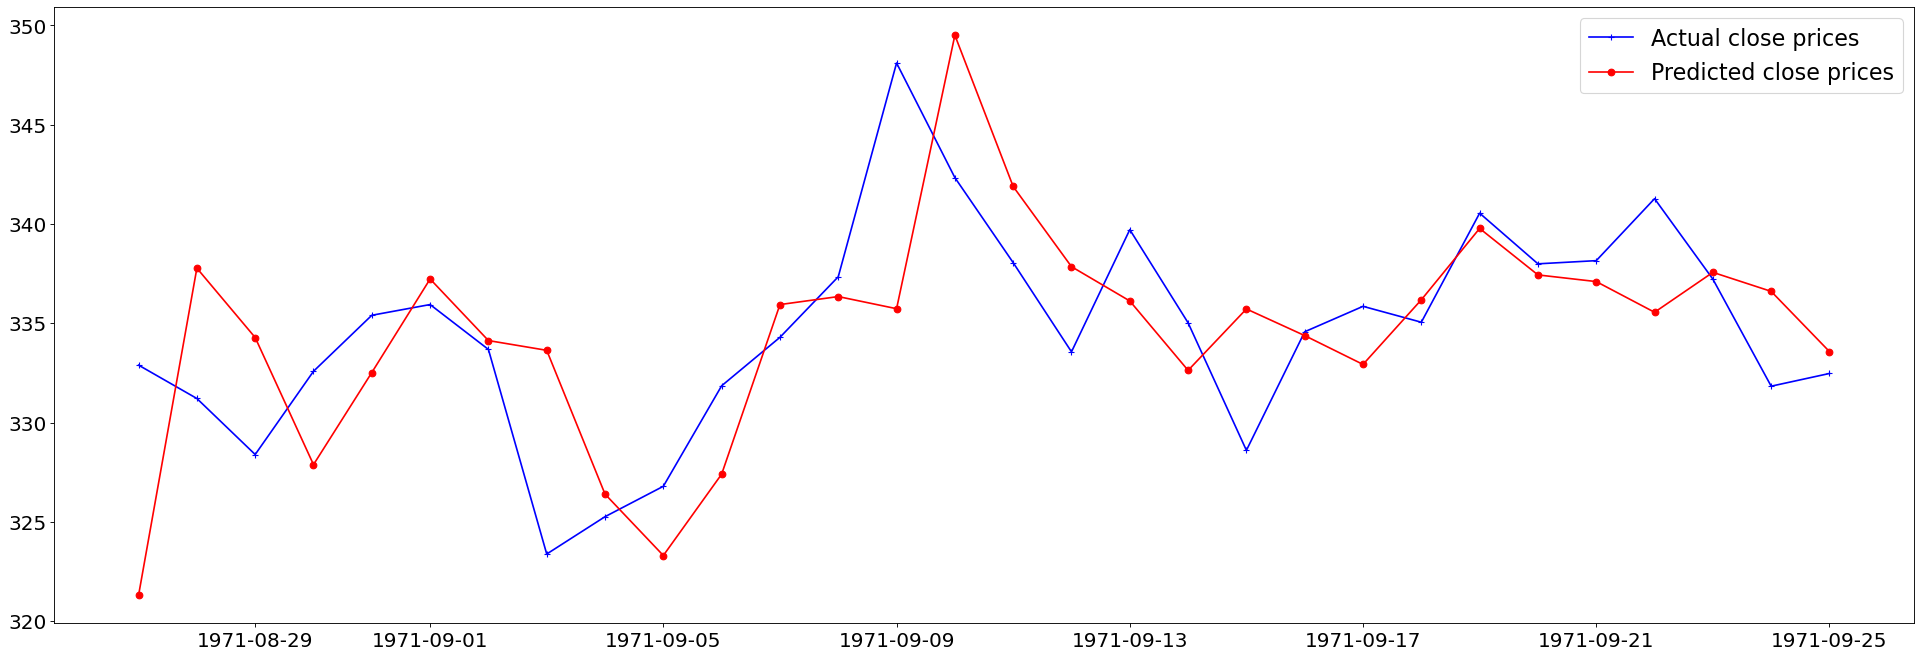

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), dpi=80)
plt.rcParams.update({'font.size': 18})

x_axis = np.array(test_data.index[0:num_days_to_predict], dtype='datetime64[D]')
plt.plot(x_axis, test_data.iloc[0:num_days_to_predict]['Close'], 'b+-', label="Actual close prices")
plt.plot(x_axis, predicted_close_prices, 'ro-', label="Predicted close prices")
plt.legend(prop={'size': 20})
plt.show()

In [18]:
print(x_axis)

['1971-08-27' '1971-08-28' '1971-08-29' '1971-08-30' '1971-08-31'
 '1971-09-01' '1971-09-02' '1971-09-03' '1971-09-04' '1971-09-05'
 '1971-09-06' '1971-09-07' '1971-09-08' '1971-09-09' '1971-09-10'
 '1971-09-11' '1971-09-12' '1971-09-13' '1971-09-14' '1971-09-15'
 '1971-09-16' '1971-09-17' '1971-09-18' '1971-09-19' '1971-09-20'
 '1971-09-21' '1971-09-22' '1971-09-23' '1971-09-24' '1971-09-25']


In [19]:
y_test=test_data.iloc[0:num_days_to_predict]['Close']
y_pred=predicted_close_prices

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squred Error:", mse)
print("Mean Absolute Percentage Error:",mape)

Mean Absolute Error: 3.8214463372178367
Mean Squred Error: 25.39095221503143
Mean Absolute Percentage Error: 0.011426268740704546


In [20]:
GaussianHMM??

Init signature:
GaussianHMM(
    n_components=1,
    covariance_type='diag',
    min_covar=0.001,
    startprob_prior=1.0,
    transmat_prior=1.0,
    means_prior=0,
    means_weight=0,
    covars_prior=0.01,
    covars_weight=1,
    algorithm='viterbi',
    random_state=None,
    n_iter=10,
    tol=0.01,
    verbose=False,
    params='stmc',
    init_params='stmc',
    implementation='log',
)
Source:        
class GaussianHMM(_emissions.BaseGaussianHMM, BaseHMM):
    """
    Hidden Markov Model with Gaussian emissions.

    Attributes
    ----------
    n_features : int
        Dimensionality of the Gaussian emissions.

    monitor_ : ConvergenceMonitor
        Monitor object used to check the convergence of EM.

    startprob_ : array, shape (n_components, )
        Initial state occupation distribution.

    transmat_ : array, shape (n_components, n_components)
        Matrix of transition probabilities between states.

    means_ : array, shape (n_components, n_features)
        Me

In [21]:
model??

Type:           GaussianHMM
String form:    GaussianHMM(n_components=3)
File:           d:\code\anaconda4-22-2024\lib\site-packages\hmmlearn\hmm.py
Source:        
class GaussianHMM(_emissions.BaseGaussianHMM, BaseHMM):
    """
    Hidden Markov Model with Gaussian emissions.

    Attributes
    ----------
    n_features : int
        Dimensionality of the Gaussian emissions.

    monitor_ : ConvergenceMonitor
        Monitor object used to check the convergence of EM.

    startprob_ : array, shape (n_components, )
        Initial state occupation distribution.

    transmat_ : array, shape (n_components, n_components)
        Matrix of transition probabilities between states.

    means_ : array, shape (n_components, n_features)
        Mean parameters for each state.

    covars_ : array
        Covariance parameters for each state.

        The shape depends on :attr:`covariance_type`:

        * (n_components, )                        if "spherical",
        * (n_components, n_fea